In [1]:
# loop throug Datasets\OHLC data folders .csv files reading them one by one as a pandas data frame

import os
import pandas as pd
import numpy as np


pattern_encoding = {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
segmen_size = 224
# padding = 5
percentage_of_a_pattern_to_be_considered = 0.75


# set the path to the folder containing the data
path = '../../Datasets/OHLC data'

#  load Datasets\scraped_blog_tables.csv into a pandas data frame
pattern_labled_df = pd.read_csv('../../Datasets/scraped_blog_tables.csv')
pattern_labled_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,12/19/2019,01/30/2020,IT Services
1,ADS,Broadening top,-1,12/13/2019,01/24/2020,Information Services
2,AVY,Triple bottom,1,12/03/2019,01/27/2020,Packaging and Container
3,CMTL,Dead-cat bounce,-1,01/29/2020,01/29/2020,Telecom. Equipment
4,CSOD,Pipe top,-1,01/13/2020,01/21/2020,E-Commerce
...,...,...,...,...,...,...
10042,SO,Head-and-shoulders top,0,09/05/2024,11/27/2024,Electric Utility (East)
10043,SRDX,Rising wedge,0,10/25/2024,12/05/2024,Medical Supplies
10044,TDOC,"Double Top, Adam and Adam",0,11/25/2024,12/02/2024,Healthcare Information
10045,TER,"Double Bottom, Adam and Eve",0,11/05/2024,11/20/2024,Semiconductor Cap Equip.


In [2]:
len(pattern_encoding)

8

In [3]:
# convert the date columns to datetime
pattern_labled_df['Start'] = pd.to_datetime(pattern_labled_df['Start'])
pattern_labled_df['End'] = pd.to_datetime(pattern_labled_df['End'])
# convert segment size to a timedelta
segmen_size_date = pd.to_timedelta(segmen_size, unit='D')

# only have the the rows wich have maximum 224 days from Start to End
pattern_labled_df = pattern_labled_df[pattern_labled_df['End'] - pattern_labled_df['Start'] <= segmen_size_date]

# only keep the rows with the patterns we are interested in
pattern_labled_df = pattern_labled_df[pattern_labled_df['Chart Pattern'].isin(pattern_encoding.keys())]
pattern_labled_df


,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,2019-12-19,2020-01-30,IT Services
14,TPX,"Double Bottom, Eve and Adam",1,2020-01-06,2020-01-27,Furn/Home Furnishings
20,BBW,"Flag, high and tight",1,2019-12-12,2020-01-23,Retail (Special Lines)
22,CIEN,"Triangle, symmetrical",1,2019-12-13,2020-01-23,Telecom. Equipment
23,EVH,"Flag, high and tight",1,2019-11-27,2020-01-17,Healthcare Information
...,...,...,...,...,...,...
10032,OXY,Head-and-shoulders top,0,2024-11-06,2024-11-22,Petroleum (Producing)
10034,ON,"Double Top, Adam and Adam",0,2024-11-25,2024-12-02,Semiconductor
10036,PETS,"Double Bottom, Eve and Adam",0,2024-11-19,2024-12-02,Medical Services
10042,SO,Head-and-shoulders top,0,2024-09-05,2024-11-27,Electric Utility (East)


In [4]:
labled_date_segment_for_this_symbol = (pattern_labled_df[pattern_labled_df['Symbol'] == "BBW"]).copy()
# order labled_date_segment_for_this_symbol by Start date
labled_date_segment_for_this_symbol = labled_date_segment_for_this_symbol.sort_values(by='Start')
print(labled_date_segment_for_this_symbol)
labled_date_segment_for_this_symbol.reset_index(drop=True, inplace=True)    
print(labled_date_segment_for_this_symbol)

# create a touple of the index of the rows of the labled_date_segment_for_this_symbol and shuffle it
index_touple = list(range(len(labled_date_segment_for_this_symbol)))
np.random.shuffle(index_touple)
index_touple

     Symbol                 Chart Pattern  BullishBearish      Start  \
20      BBW          Flag, high and tight               1 2019-12-12   
305     BBW          Flag, high and tight               1 2020-04-03   
549     BBW     Head-and-shoulders bottom               1 2020-05-04   
1506    BBW          Flag, high and tight               1 2021-01-11   
1637    BBW          Flag, high and tight               1 2021-03-29   
5068    BBW          Flag, high and tight               0 2022-09-30   
5119    BBW         Triangle, symmetrical               0 2022-12-14   
8832    BBW  Double Bottom, Adam and Adam               0 2024-07-09   
9635    BBW        Head-and-shoulders top               0 2024-10-31   

            End                Industry  
20   2020-01-23  Retail (Special Lines)  
305  2020-04-23  Retail (Special Lines)  
549  2020-06-02  Retail (Special Lines)  
1506 2021-03-10  Retail (Special Lines)  
1637 2021-05-27  Retail (Special Lines)  
5068 2022-12-08  Retail (Sp

[6, 0, 2, 4, 5, 1, 3, 8, 7]

In [5]:
ohcl_segments_df = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])
# and give this 2 level indexes, level 0 called Instance and level 1 called Time
ohcl_segments_df.index = pd.MultiIndex.from_tuples([], names=['Instance', 'Time'])
ohcl_segments_df

,,Open,High,Low,Close
Instance,Time,,,,


In [6]:
lable_df = pd.DataFrame(columns=['Pattern', 'Center', 'Width'])
# and give this 2 level indexes, level 0 called Instance and level 1 called Pattern_Id
lable_df.index = pd.MultiIndex.from_tuples([], names=['Instance', 'Pattern_Id'])

def add_to_lables( pattern, center, width ,instance, pattern_idx):
    global lable_df
    new_row = { 
                'Pattern': pattern,  # Example pattern
                'Center': center ,  # Example start date
                'Width': width # Example end date
            }
    # Define the MultiIndex for the new row
    new_index = pd.MultiIndex.from_tuples([(instance, pattern_idx)], names=['Instance', 'Pattern_Id'])

    # Create a DataFrame for the new row and append it to the original DataFrame
    new_df = pd.DataFrame([new_row], index=new_index, columns=lable_df.columns)
    lable_df = pd.concat([lable_df, new_df])

In [7]:
lable_df

,,Pattern,Center,Width
Instance,Pattern_Id,,,


In [8]:
# read a one OHCL data file\
ohcl_df = pd.read_csv('../../Datasets/OHLC data/BBW.csv')

# convert the date columns to datetime
ohcl_df['Date'] = pd.to_datetime(ohcl_df['Date'])
# get the max and min date of the data
max_date = ohcl_df['Date'].max()
min_date = ohcl_df['Date'].min()
max_date

Timestamp('2024-12-20 00:00:00')

In [9]:
pattern_labled_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,2019-12-19,2020-01-30,IT Services
14,TPX,"Double Bottom, Eve and Adam",1,2020-01-06,2020-01-27,Furn/Home Furnishings
20,BBW,"Flag, high and tight",1,2019-12-12,2020-01-23,Retail (Special Lines)
22,CIEN,"Triangle, symmetrical",1,2019-12-13,2020-01-23,Telecom. Equipment
23,EVH,"Flag, high and tight",1,2019-11-27,2020-01-17,Healthcare Information
...,...,...,...,...,...,...
10032,OXY,Head-and-shoulders top,0,2024-11-06,2024-11-22,Petroleum (Producing)
10034,ON,"Double Top, Adam and Adam",0,2024-11-25,2024-12-02,Semiconductor
10036,PETS,"Double Bottom, Eve and Adam",0,2024-11-19,2024-12-02,Medical Services
10042,SO,Head-and-shoulders top,0,2024-09-05,2024-11-27,Electric Utility (East)


In [10]:
from tqdm import tqdm
instance = 0

# loop through the files in the folder
for filename in tqdm(os.listdir(path), desc="Processing files"):
    if filename.endswith('.csv'):
        # print(filename)
        OHCL_symbol_df = pd.read_csv(path + '/' + filename)
        # print(df.head())
        
        # convert the date columns to datetime
        OHCL_symbol_df['Date'] = pd.to_datetime(OHCL_symbol_df['Date'])
        
        max_available_date = OHCL_symbol_df['Date'].max()
        min_available_date = OHCL_symbol_df['Date'].min()
        
        max_available_date = max_available_date.tz_localize(None)
        min_available_date = min_available_date.tz_localize(None)

        
        # get the file name without the extension
        name = os.path.splitext(filename)[0]
        # get the rows of pattern_labled_df where Symbol == name
        labled_date_segment_for_this_symbol = (pattern_labled_df[pattern_labled_df['Symbol'] == name]).copy()
        
        # convert the Start and End columns to datetime
        labled_date_segment_for_this_symbol['Start'] = pd.to_datetime(labled_date_segment_for_this_symbol['Start'])
        labled_date_segment_for_this_symbol['End'] = pd.to_datetime(labled_date_segment_for_this_symbol['End'])
        
        # order labled_date_segment_for_this_symbol by Start date
        labled_date_segment_for_this_symbol = labled_date_segment_for_this_symbol.sort_values(by='Start')
        labled_date_segment_for_this_symbol.reset_index(drop=True, inplace=True)  
        
        
        # instead of incrementing the index, draw a index randomly from a pool, then instead of checking the forward for fitting pattern look eaither forward or bck word first at random then the other 
        
        # create a touple of the index of the rows of the labled_date_segment_for_this_symbol and shuffle it
        index_touple = list(range(len(labled_date_segment_for_this_symbol)))
        np.random.shuffle(index_touple)
        
        
        while index_touple != []:
            # print("index_touple", index_touple)
            index = index_touple.pop()
            # pattern_idx  = 0
            patterns_for_this_instance = []
            
            
            row = labled_date_segment_for_this_symbol.iloc[index]
            # print('popped index', index)
            
            # get the start and end date of the segment
            start_date = row['Start'] 
            end_date = row['End'] 
            # get the pattern
            pattern = row['Chart Pattern']
            # get the encoding of the pattern
            pattern_encoding_value = pattern_encoding[pattern]
            
            usable_start_date = max(start_date, min_available_date)
            usable_end_date = min(end_date, max_available_date)
            
            usable_precentage = (usable_end_date - usable_start_date) / (end_date - start_date)
            if usable_precentage < percentage_of_a_pattern_to_be_considered:
                continue
            
            # add_to_lables( pattern_encoding_value, row['Start'] , row['End'] , instance, pattern_idx)
            patterns_for_this_instance.append([pattern_encoding_value, start_date, end_date])
            # print("pattern_idx", pattern_idx , "pattern_encoding_value", pattern_encoding_value , "start_date", start_date, "end_date", end_date)
            # pattern_idx += 1
                        
            pattern_length = end_date - start_date
            extra_days = segmen_size_date - pattern_length
            
            # randomly pick +1 or -1
            direction = np.random.choice([-1, 1])
            
            pattern_to_right_exists = True
            pattern_to_left_exists = True
            
            while extra_days and index_touple != [] and (pattern_to_right_exists or pattern_to_left_exists):
                # print('direction', direction)
                if direction == 1:
                    # get the next index that is next bigger than the current index
                    # get the list of values that are biggr than the current index from index_touple
                    bigger = [i for i in index_touple if i > index]
                    # print("bigger list", bigger)
                    if bigger:
                        new_large_index = min(bigger)
                        # print("new_large_index", new_large_index)
                        new_large_row = labled_date_segment_for_this_symbol.iloc[new_large_index]
                        new_large_start_date = new_large_row['Start'] 
                        new_large_end_date = new_large_row['End'] 
                        
                        max_end_now = end_date + extra_days
                        right_margin_for_new_pattern = min(new_large_end_date, max_end_now,max_available_date)
                        
                        
                        # if the new pattern can fit in the segment
                        if new_large_start_date <= max_end_now :
                            portion_of_new_pattern = (right_margin_for_new_pattern- new_large_start_date)/ (new_large_end_date - new_large_start_date)
                            # print("portion_of_new_pattern", portion_of_new_pattern)
                            if portion_of_new_pattern >= percentage_of_a_pattern_to_be_considered:
                                # get the pattern
                                new_pattern = new_large_row['Chart Pattern']
                                # get the encoding of the pattern
                                new_pattern_encoding_value = pattern_encoding[new_pattern] 
                                # pattern_idx += 1
                                # add_to_lables(new_pattern_encoding_value, new_large_start_date, right_margin_for_new_pattern, instance, pattern_idx)
                                patterns_for_this_instance.append([new_pattern_encoding_value, new_large_start_date, right_margin_for_new_pattern])
                                # print("pattern_idx", pattern_idx , "new_pattern_encoding_value", new_pattern_encoding_value , "new_large_start_date", new_large_start_date, "right_margin_for_new_pattern", right_margin_for_new_pattern)
                                end_date = right_margin_for_new_pattern
                                extra_days = segmen_size_date - (end_date - start_date)
                                direction = -direction
                                index_touple.remove(new_large_index)
                                continue
                                
                    
                    # if no pattern to the right detected and the loop didnt get continued   
                    pattern_to_right_exists = False
                    direction = -direction
                    
                    
                elif direction == -1:
                    # get the next index that is next smaller than the current index
                    # get the list of values that are smaller than the current index from index_touple
                    smaller = [i for i in index_touple if i < index]
                    # print("smaller list", smaller)
                    if smaller:
                        new_small_index = max(smaller)
                        # print("new_small_index", new_small_index)
                        new_small_row = labled_date_segment_for_this_symbol.iloc[new_small_index]
                        new_small_start_date = new_small_row['Start'] 
                        new_small_end_date = new_small_row['End'] 
                        
                        min_start_now = start_date - extra_days
                        left_margin_for_new_pattern = max(new_small_start_date, min_start_now,min_available_date)
                        
                        if_so_extra_days = segmen_size_date - (end_date - left_margin_for_new_pattern)
                        max_end_now = end_date + if_so_extra_days
                        
                        right_margin_for_new_pattern = min(new_small_end_date, max_end_now,max_available_date)
                        
                        # if the new pattern can fit in the segment
                        if new_small_end_date >= min_start_now :
                            portion_of_new_pattern = (right_margin_for_new_pattern-left_margin_for_new_pattern) / (new_small_end_date - new_small_start_date)
                            # print("portion_of_new_pattern", portion_of_new_pattern)
                            if portion_of_new_pattern >= percentage_of_a_pattern_to_be_considered:
                                # get the pattern
                                new_pattern = new_small_row['Chart Pattern']
                                # get the encoding of the pattern
                                new_pattern_encoding_value = pattern_encoding[new_pattern] 
                                # pattern_idx += 1
                                # add_to_lables(new_pattern_encoding_value, left_margin_for_new_pattern, new_small_end_date, instance, pattern_idx)
                                patterns_for_this_instance.append([new_pattern_encoding_value, left_margin_for_new_pattern, right_margin_for_new_pattern])
                                # print("pattern_idx", pattern_idx , "new_pattern_encoding_value", new_pattern_encoding_value , "left_margin_for_new_pattern", left_margin_for_new_pattern, "new_small_end_date", new_small_end_date)
                                start_date = left_margin_for_new_pattern
                                extra_days = segmen_size_date - (end_date - start_date)
                                direction = -direction
                                index_touple.remove(new_small_index)
                                continue
                                
                    
                    # if no pattern to the left detected and the loop didnt get continued   
                    pattern_to_left_exists = False
                    direction = -direction
            
            
            # print("extra_days", extra_days)
            if extra_days != pd.Timedelta('0 days'):
                # generate a random number between 0 and extra_days
                random_number = np.random.randint(0, extra_days.days)
            else:
                random_number = 0
            
            # select a random date segmont that will contain the pattern
            segment_start_date = start_date - pd.to_timedelta(random_number, unit='D')
            segment_end_date = segment_start_date + segmen_size_date
            
            # overflow_right = segment_end_date - max_available_date
            # overflow_left = min_available_date - segment_start_date
            
            # if overflow_right > pd.Timedelta('0 days') and overflow_left > pd.Timedelta('0 days'):
            #     print("overflow_right", overflow_right, "overflow_left", overflow_left)
            #     continue
            # elif overflow_right > pd.Timedelta('0 days'):
            #     segment_start_date = segment_start_date - overflow_right
            #     segment_end_date = segment_end_date - overflow_right
            # elif overflow_left > pd.Timedelta('0 days'):
            #     segment_start_date = segment_start_date + overflow_left
            #     segment_end_date = segment_end_date + overflow_left
            
            # print ("segment_start_date", segment_start_date, "segment_end_date", segment_end_date)
            
            # convert to datetime
            segment_start_date = pd.Timestamp(segment_start_date, tz='UTC')
            segment_end_date = pd.Timestamp(segment_end_date, tz='UTC')

            # convert OHCL_symbol_df['Date'] to datetime if it's not already
            OHCL_symbol_df['Date'] = pd.to_datetime(OHCL_symbol_df['Date'])

            # check if 'Date' is already timezone-aware
            if OHCL_symbol_df['Date'].dt.tz is None:
                OHCL_symbol_df['Date'] = OHCL_symbol_df['Date'].dt.tz_localize('UTC')
            else:
                OHCL_symbol_df['Date'] = OHCL_symbol_df['Date'].dt.tz_convert('UTC')

            # get the rows of OHCL_symbol_df where Date >= start_date and Date <= end_date
            date_segment = OHCL_symbol_df[(OHCL_symbol_df['Date'] >= segment_start_date) & (OHCL_symbol_df['Date'] <= segment_end_date)]
            
            # get the minimum and maximum date of the segment date_segment
            min_date = date_segment['Date'].min()
            max_date = date_segment['Date'].max()
            
            # print ("min_date", min_date, "max_date", max_date)
            # print ("segment_start_date", segment_start_date, "segment_end_date", segment_end_date)
            
            # rows = []
            # time = 0
            # for i, row in date_segment.iterrows():
            #     rows.append(((instance, time), row[['Open', 'High', 'Low', 'Close']].values))
            #     print("in loooooooop",row[['Open', 'High', 'Low', 'Close']].values)
            #     time += 1
            
            pick_date = segment_start_date
            time = 0
            rows = []
            while pick_date < segment_end_date:
                # Filter the row for the current pick_date
                row = OHCL_symbol_df[OHCL_symbol_df['Date'] == pick_date]
                
                if not row.empty:
                    # Append the actual values if data exists
                    rows.append(((instance, time), (row[['Open', 'High', 'Low', 'Close']].values)[0]))
                else:
                    # Append a 2D array of nan values if no data exists
                    rows.append(((instance, time), [np.nan, np.nan, np.nan, np.nan]))
                    # print("no data for", pick_date)
                
                # Increment time and pick_date
                time += 1
                pick_date += pd.Timedelta('1 days')

            
            # print("rows", rows)

            # Convert rows to DataFrame and concatenate
            new_data = pd.DataFrame.from_dict(dict(rows), orient='index', columns=['Open', 'High', 'Low', 'Close'])
            new_data.index = pd.MultiIndex.from_tuples(new_data.index, names=['Instance', 'Time'])


            ohcl_segments_df = pd.concat([ohcl_segments_df, new_data])
            
            pattern_idx =0
            for pattern in patterns_for_this_instance:
                
                pattern_encoding_value = pattern[0]
                start_date = pattern[1]
                end_date = pattern[2]         
                
                # convert to date time
                start_date = pd.Timestamp(start_date, tz='UTC')
                end_date = pd.Timestamp(end_date, tz='UTC')
                   
                
                pattern_start_cordinate = (start_date - segment_start_date) / segmen_size_date
                pattern_end_cordinate = (end_date - segment_start_date) / segmen_size_date
                pattern_center_cordinate = (pattern_start_cordinate + pattern_end_cordinate) / 2
                pattern_width = pattern_end_cordinate - pattern_start_cordinate
                
                if (pattern_center_cordinate < 0) or (pattern_center_cordinate > 1) :
                    continue
                
                # print("pattern_encoding_value", pattern_encoding_value, "pattern_start_cordinate", pattern_start_cordinate, "pattern_end_cordinate", pattern_end_cordinate, "pattern_center_cordinate", pattern_center_cordinate, "pattern_width", pattern_width)
                
                add_to_lables(pattern_encoding_value, pattern_center_cordinate, pattern_width, instance, pattern_idx)
                pattern_idx += 1
            
            
           
            
            # print("instance", instance)
            # print ("ohcl_segments_df", ohcl_segments_df)
            # print("lable_df", lable_df)
            
            if pattern_idx > 0:
                            instance += 1

        
        


Processing files:   0%|          | 0/605 [00:00<?, ?it/s]C:\Users\gwiku\AppData\Local\Temp\ipykernel_44060\3400422609.py:252: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ohcl_segments_df = pd.concat([ohcl_segments_df, new_data])
C:\Users\gwiku\AppData\Local\Temp\ipykernel_44060\1528095095.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lable_df = pd.concat([lable_df, new_df])
Processing files: 100%|██████████| 605/605 [06:51<00:00,  1.47it/s]


In [11]:
def normalize_dataset(dataset):
    # calculate the min values from Low column and max values from High column for each instance
    min_low = dataset.groupby(level='Instance')['Low'].transform('min')
    max_high = dataset.groupby(level='Instance')['High'].transform('max')
    
    # OHLC columns to normalize
    ohlc_columns = ['Open', 'High', 'Low', 'Close']
    
    dataset_normalized = dataset.copy()
    
    # Apply the normalization formula to all columns in one go
    dataset_normalized[ohlc_columns] = (dataset_normalized[ohlc_columns] - min_low.values[:, None]) / (max_high.values[:, None] - min_low.values[:, None])
    
    # if there is a Volume column normalize it
    if 'Volume' in dataset.columns:
        # calculate the min values from Volume column and max values from Volume column for each instance
        min_volume = dataset.groupby(level='Instance')['Volume'].transform('min')
        max_volume = dataset.groupby(level='Instance')['Volume'].transform('max')
        
        # Normalize the Volume column
        dataset_normalized['Volume'] = (dataset_normalized['Volume'] - min_volume.values) / (max_volume.values - min_volume)
    
    
    return dataset_normalized    

In [12]:
ohcl_segments_df.head(20)

Open        High         Low       Close
Instance Time                                                
0        0     155.089996  156.960007  154.710007  156.960007
         1            NaN         NaN         NaN         NaN
         2            NaN         NaN         NaN         NaN
         3     155.869995  156.850006  151.729996  152.300003
         4     151.880005  152.899994  150.490005  150.940002
         5     151.380005  154.979996  149.100006  154.979996
         6     156.729996  156.990005  154.419998  156.119995
         7     153.970001  156.729996  153.589996  155.669998
         8            NaN         NaN         NaN         NaN
         9            NaN         NaN         NaN         NaN
         10    153.839996  153.889999  151.250000  152.699997
         11    152.149994  153.000000  149.910004  151.350006
         12    151.229996  154.350006  151.130005  153.729996
         13    154.419998  156.990005  153.479996  156.279999
         14    155.669998  156.699997  152.679993  152.949997
         15           NaN         NaN         NaN         NaN
         16           NaN         NaN         NaN         NaN
         17    154.009995  155.979996  153.429993  155.330002
         18    159.199997  160.259995  156.759995  157.660004
         19    157.259995  158.440002  154.160004  154.809998

In [13]:
normalized_ohcl_segments_df = normalize_dataset(ohcl_segments_df)
normalized_ohcl_segments_df

Open      High       Low     Close
Instance Time                                        
0        0     0.889953  0.929758  0.881865  0.929758
         1          NaN       NaN       NaN       NaN
         2          NaN       NaN       NaN       NaN
         3     0.906556  0.927416  0.818433  0.830566
         4     0.821626  0.843338  0.792039  0.801618
...                 ...       ...       ...       ...
1694     219   0.458294  0.494318  0.449315  0.494318
         220        NaN       NaN       NaN       NaN
         221        NaN       NaN       NaN       NaN
         222   0.484249  0.514009  0.483681  0.510422
         223   0.501378  0.520985  0.480785  0.505343

[379680 rows x 4 columns]

In [14]:
non_normalized_ohcl_segments_df = ohcl_segments_df.copy()
ohcl_segments_df = normalized_ohcl_segments_df

In [15]:
non_normalized_ohcl_segments_df

Open          High           Low         Close
Instance Time                                                        
0        0       155.089996    156.960007    154.710007    156.960007
         1              NaN           NaN           NaN           NaN
         2              NaN           NaN           NaN           NaN
         3       155.869995    156.850006    151.729996    152.300003
         4       151.880005    152.899994    150.490005    150.940002
...                     ...           ...           ...           ...
1694     219   12866.309570  13047.190430  12821.219727  13047.190430
         220            NaN           NaN           NaN           NaN
         221            NaN           NaN           NaN           NaN
         222   12996.629883  13146.059570  12993.780273  13128.049805
         223   13082.639648  13181.089844  12979.240234  13102.549805

[379680 rows x 4 columns]

In [16]:
ohcl_segments_df 

Open      High       Low     Close
Instance Time                                        
0        0     0.889953  0.929758  0.881865  0.929758
         1          NaN       NaN       NaN       NaN
         2          NaN       NaN       NaN       NaN
         3     0.906556  0.927416  0.818433  0.830566
         4     0.821626  0.843338  0.792039  0.801618
...                 ...       ...       ...       ...
1694     219   0.458294  0.494318  0.449315  0.494318
         220        NaN       NaN       NaN       NaN
         221        NaN       NaN       NaN       NaN
         222   0.484249  0.514009  0.483681  0.510422
         223   0.501378  0.520985  0.480785  0.505343

[379680 rows x 4 columns]

In [17]:
ohcl_segments_df = ohcl_segments_df.interpolate(method='linear', axis=0)


# Fill NaN at the start and end using forward and backward fill
ohcl_segments_df = ohcl_segments_df.fillna(method='bfill').fillna(method='ffill')

ohcl_segments_df.head(20)

C:\Users\gwiku\AppData\Local\Temp\ipykernel_44060\3800791662.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ohcl_segments_df = ohcl_segments_df.fillna(method='bfill').fillna(method='ffill')


Open      High       Low     Close
Instance Time                                        
0        0     0.889953  0.929758  0.881865  0.929758
         1     0.895487  0.928977  0.860721  0.896694
         2     0.901022  0.928197  0.839577  0.863630
         3     0.906556  0.927416  0.818433  0.830566
         4     0.821626  0.843338  0.792039  0.801618
         5     0.810984  0.887612  0.762452  0.887612
         6     0.924862  0.930396  0.875692  0.911877
         7     0.866113  0.924862  0.858025  0.902299
         8     0.865191  0.904711  0.841422  0.881226
         9     0.864269  0.884561  0.824819  0.860153
         10    0.863346  0.864410  0.808216  0.839080
         11    0.827373  0.845466  0.779694  0.810345
         12    0.807791  0.874202  0.805662  0.861005
         13    0.875692  0.930396  0.855683  0.915283
         14    0.902299  0.924223  0.838655  0.844402
         15    0.890521  0.919115  0.843976  0.861289
         16    0.878743  0.914006  0.849298  0.878175
         17    0.866965  0.908897  0.854619  0.895062
         18    0.977437  1.000000  0.925500  0.944657
         19    0.936143  0.961260  0.870158  0.883993

In [18]:
lable_df

Pattern    Center     Width
Instance Pattern_Id                            
0        0                4  0.977679  0.035714
         1                5  0.520089  0.174107
         2                1  0.319196  0.084821
1        0                6  0.138393  0.276786
         1                6  0.906250  0.187500
...                     ...       ...       ...
1692     0                4  0.446429  0.026786
         1                0  0.296875  0.031250
1693     0                4  0.866071  0.035714
1694     0                0  0.142857  0.035714
         1                5  0.593750  0.053571

[2753 rows x 3 columns]

In [19]:
import os

# create the 'Datasets' directory if it doesn't exist
os.makedirs('Datasets', exist_ok=True)

# save both prepared data frames to a file
ohcl_segments_df.to_csv('Datasets/ohcl_segments_df.csv')
lable_df.to_csv('Datasets/lable_df.csv')

In [20]:
# load saved data frames
ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv', index_col=[0, 1])
lable_df = pd.read_csv('Datasets/lable_df.csv', index_col=[0, 1])

In [21]:
# get the number of level 0 indexes in the label_df
num_instances = lable_df.index.get_level_values('Instance').nunique()
num_instances

1695

In [22]:
# get items from the label_df for the instance 7 pattern_id 1
lable_df.loc[1]


,Pattern,Center,Width
Pattern_Id,,,
0,6,0.138393,0.276786
1,6,0.906250,0.187500


In [23]:
ohcl_segments_df.loc[1] 

,Open,High,Low,Close
Time,,,,
0,0.025568,0.047348,0.000000,0.017992
1,0.035669,0.065025,0.014836,0.036300
2,0.045770,0.082702,0.029672,0.054609
3,0.055871,0.100379,0.044508,0.072917
4,0.128788,0.186553,0.111742,0.118371
...,...,...,...,...
219,0.882576,0.933396,0.848485,0.901515
220,0.920455,0.985322,0.883523,0.942235
221,0.957386,0.982955,0.921402,0.966856


In [24]:
import torch

index = 1

# Extract rows using .loc
label_row = lable_df.loc[index].copy()
ohcl_row = ohcl_segments_df.loc[index].copy()

# Convert the Pattern column to int in the label_row
label_row['Pattern'] = label_row['Pattern'].astype(int)

# Convert to tensors
label = torch.tensor(label_row.values)
ohcl = torch.tensor(ohcl_row.values)


In [25]:
label

tensor([[6.0000, 0.1384, 0.2768],
        [6.0000, 0.9062, 0.1875]], dtype=torch.float64)

In [26]:
ohcl

tensor([[0.0256, 0.0473, 0.0000, 0.0180],
        [0.0357, 0.0650, 0.0148, 0.0363],
        [0.0458, 0.0827, 0.0297, 0.0546],
        [0.0559, 0.1004, 0.0445, 0.0729],
        [0.1288, 0.1866, 0.1117, 0.1184],
        [0.1316, 0.1591, 0.1174, 0.1402],
        [0.1771, 0.2121, 0.1364, 0.1544],
        [0.1731, 0.2057, 0.1340, 0.1577],
        [0.1690, 0.1993, 0.1316, 0.1610],
        [0.1650, 0.1929, 0.1293, 0.1643],
        [0.1610, 0.1866, 0.1269, 0.1676],
        [0.1979, 0.2462, 0.1742, 0.1837],
        [0.1373, 0.1553, 0.1165, 0.1402],
        [0.1354, 0.1534, 0.0956, 0.1117],
        [0.1392, 0.1742, 0.1373, 0.1714],
        [0.1398, 0.1821, 0.1383, 0.1670],
        [0.1405, 0.1900, 0.1392, 0.1626],
        [0.1411, 0.1978, 0.1402, 0.1581],
        [0.1250, 0.1525, 0.1212, 0.1458],
        [0.1752, 0.1913, 0.1468, 0.1676],
        [0.2017, 0.2178, 0.1378, 0.1430],
        [0.1430, 0.1581, 0.1170, 0.1297],
        [0.1405, 0.1594, 0.1162, 0.1367],
        [0.1379, 0.1607, 0.1154, 0

In [27]:
ohcl_resape = ohcl.T.reshape(4, -1)
ohcl_resape

tensor([[0.0256, 0.0357, 0.0458, 0.0559, 0.1288, 0.1316, 0.1771, 0.1731, 0.1690,
         0.1650, 0.1610, 0.1979, 0.1373, 0.1354, 0.1392, 0.1398, 0.1405, 0.1411,
         0.1250, 0.1752, 0.2017, 0.1430, 0.1405, 0.1379, 0.1354, 0.1676, 0.2244,
         0.2680, 0.1970, 0.1862, 0.1755, 0.1648, 0.2121, 0.1998, 0.1951, 0.1761,
         0.1806, 0.1850, 0.1894, 0.1922, 0.1449, 0.0909, 0.0871, 0.0988, 0.1105,
         0.1222, 0.1913, 0.2159, 0.2348, 0.2386, 0.2481, 0.2576, 0.2670, 0.2765,
         0.3163, 0.3958, 0.3314, 0.3292, 0.3270, 0.3248, 0.3636, 0.4186, 0.4801,
         0.6544, 0.6547, 0.6550, 0.6553, 0.6250, 0.6373, 0.4839, 0.5133, 0.5038,
         0.4943, 0.4848, 0.5909, 0.5464, 0.5189, 0.5871, 0.5694, 0.5518, 0.5341,
         0.6004, 0.5852, 0.4953, 0.5521, 0.5341, 0.5161, 0.4981, 0.4792, 0.5114,
         0.5189, 0.5211, 0.5232, 0.5253, 0.5275, 0.5161, 0.5956, 0.4972, 0.4460,
         0.4789, 0.5117, 0.5445, 0.5303, 0.6695, 0.6657, 0.7348, 0.7146, 0.6944,
         0.6742, 0.6676, 0.6

In [28]:
print(label_row.dtypes)


Pattern      int32
Center     float64
Width      float64
dtype: object


In [29]:
print(ohcl_row.dtypes)

Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [30]:
import torch

# Convert label_row to a tensor
label = torch.tensor(label_row.values)

# Convert ohcl_row to a tensor
ohcl = torch.tensor(ohcl_row.values)


In [31]:
label_row

,Pattern,Center,Width
Pattern_Id,,,
0,6,0.138393,0.276786
1,6,0.906250,0.187500


In [32]:
label

tensor([[6.0000, 0.1384, 0.2768],
        [6.0000, 0.9062, 0.1875]], dtype=torch.float64)

segmen_size 224
Counter({1: 942, 2: 519, 3: 175, 4: 50, 5: 6, 6: 3})


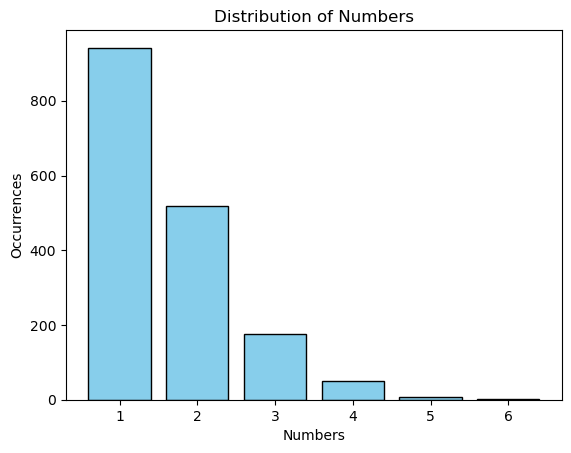

In [33]:
import matplotlib.pyplot as plt
from collections import Counter

# get the number of level 1 indexes in a single level 0 index from highest number to lowest
pattern_count_in_a_instance = lable_df.index.get_level_values(0).value_counts()
# convert pattern_count_in_a_instance to a value list
pattern_count_in_a_instance = pattern_count_in_a_instance.values


# Count the occurrences of each number
number_counts = Counter(pattern_count_in_a_instance)

print("segmen_size", segmen_size)
print(number_counts)

# Prepare data for plotting
labels = list(number_counts.keys())
counts = list(number_counts.values())

# Create the bar plot
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Numbers')
plt.ylabel('Occurrences')
plt.title('Distribution of Numbers')
plt.xticks(labels)
plt.show()

segmen_size 100
{1: 1829, 2: 411, 3: 52, 4: 4}


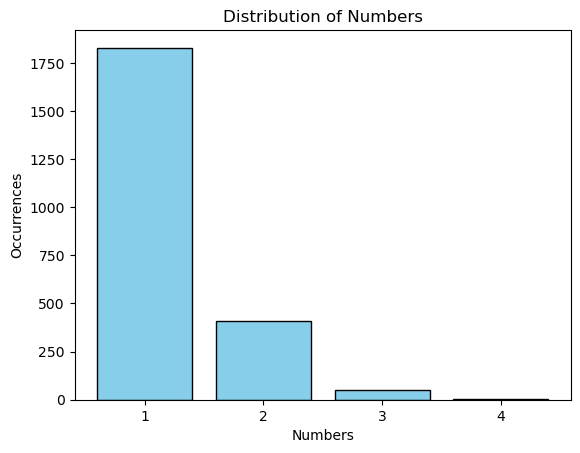

In [34]:
number_counts= {1: 1829, 2: 411, 3: 52, 4: 4}


print("segmen_size", 100)
print(number_counts)

# Prepare data for plotting
labels = list(number_counts.keys())
counts = list(number_counts.values())

# Create the bar plot
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Numbers')
plt.ylabel('Occurrences')
plt.title('Distribution of Numbers')
plt.xticks(labels)
plt.show()

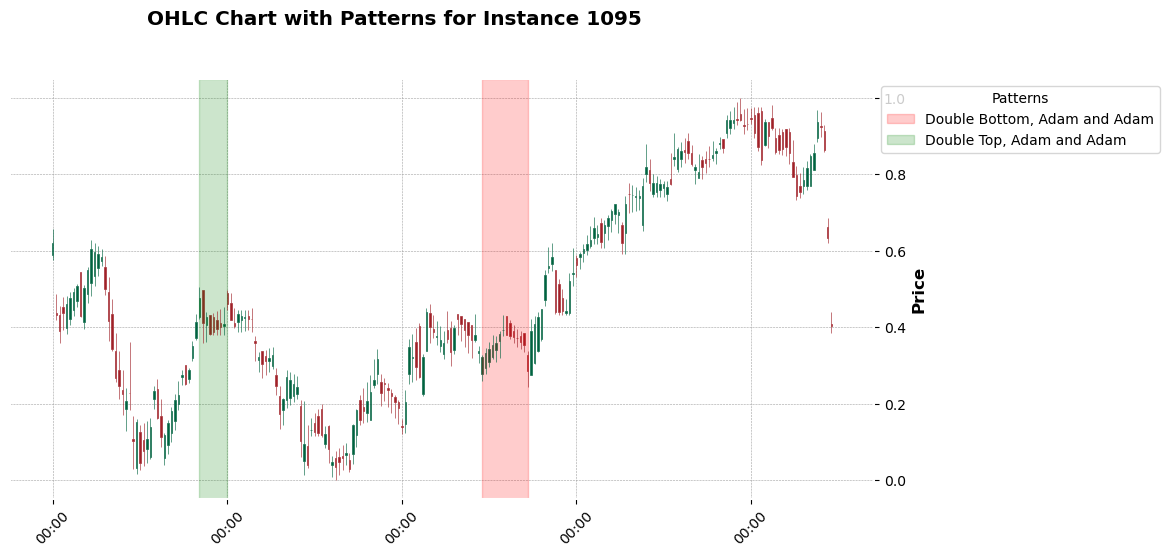

In [35]:
import pandas as pd
import numpy as np
import random
import mplfinance as mpf
import matplotlib.pyplot as plt

# Random seed for reproducibility
random.seed(43)

# Assuming pattern_encoding dictionary is available
pattern_encoding_inv = pattern_encoding
pattern_encoding_inv = {v: k for k, v in pattern_encoding_inv.items()}

# Randomly pick 5 unique instances
instances = ohcl_segments_df.index.get_level_values('Instance').unique()
# selected_instances = random.sample(list(instances), 5)
selected_instances = [1095]

# Colors for the patterns
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'black', 'pink']

# Loop through selected instances
for instance in selected_instances:
    # Extract OHLC data for the instance
    ohcl_data = ohcl_segments_df.loc[instance]
    
    # Create a candlestick plot using mplfinance
    ohlc_for_mpf = ohcl_data[['Open', 'High', 'Low', 'Close']].copy()
    ohlc_for_mpf.index = pd.to_datetime(ohcl_data.index)
    
    # Create the base plot (this returns a figure and axes)
    fig, axes = mpf.plot(ohlc_for_mpf, type='candle', style='charles', title=f'OHLC Chart with Patterns for Instance {instance}',
                         ylabel='Price', figsize=(12, 6), returnfig=True)  # Set figsize here
    
    ax = axes[0]  # Access the first (and only) axis object
    
    # Patterns data for the current instance
    patters = lable_df.loc[instance]
    
    # Loop through the patterns and highlight them on the chart
    color_index = 0
    for index, row in patters.iterrows():
        pattern_center = row['Center']
        pattern_width = row['Width']
        pattern_label = pattern_encoding_inv[row['Pattern']]
        
        # Calculate pattern start and end positions (scaled for the width)
        pattern_start = (pattern_center - pattern_width/2) * len(ohlc_for_mpf)
        pattern_end = (pattern_center + pattern_width/2) * len(ohlc_for_mpf)
        
        # Add a vertical span (highlight the pattern) to the chart
        ax.axvspan(pattern_start, pattern_end, color=colors[color_index], alpha=0.2, label=pattern_label)
        color_index += 1

    # Customize the chart with grid, labels, and legend
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Patterns")
    
    # Show the chart
    plt.show()


In [36]:
lable_df.loc[1]

,Pattern,Center,Width
Pattern_Id,,,
0,6,0.138393,0.276786
1,6,0.906250,0.187500


In [37]:

import pandas as pd
# Load the DataFrame (normally imported as shown)
label_df = pd.read_csv('Datasets/lable_df.csv')

# Convert "Instance" and "Pattern_Id" columns into a MultiIndex
label_df = label_df.set_index(['Instance', 'Pattern_Id'])

# Verify the MultiIndex structure
print(label_df.head())

ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv')

# Convert "Instance" and "Time" columns into a MultiIndex
ohcl_segments_df = ohcl_segments_df.set_index(['Instance', 'Time'])

# Verify the MultiIndex structure
print(ohcl_segments_df.head())


                     Pattern    Center     Width
Instance Pattern_Id                             
0        0                 4  0.977679  0.035714
         1                 5  0.520089  0.174107
         2                 1  0.319196  0.084821
1        0                 6  0.138393  0.276786
         1                 6  0.906250  0.187500
                   Open      High       Low     Close
Instance Time                                        
0        0     0.889953  0.929758  0.881865  0.929758
         1     0.895487  0.928977  0.860721  0.896694
         2     0.901022  0.928197  0.839577  0.863630
         3     0.906556  0.927416  0.818433  0.830566
         4     0.821626  0.843338  0.792039  0.801618


In [38]:
# get   the sub sets of the  datasets where the instence index is from 0 to 4
label_df_subset = label_df.loc[0:4]
ohcl_segments_df_subset = ohcl_segments_df.loc[0:4]

In [39]:
ohcl_segments_df_subset

Open      High       Low     Close
Instance Time                                        
0        0     0.889953  0.929758  0.881865  0.929758
         1     0.895487  0.928977  0.860721  0.896694
         2     0.901022  0.928197  0.839577  0.863630
         3     0.906556  0.927416  0.818433  0.830566
         4     0.821626  0.843338  0.792039  0.801618
...                 ...       ...       ...       ...
4        219   0.501931  0.638491  0.469212  0.534197
         220   0.536242  0.634174  0.488525  0.521018
         221   0.570552  0.629857  0.507839  0.507839
         222   0.553511  0.676892  0.534424  0.637355
         223   0.609407  0.641104  0.510566  0.516701

[1120 rows x 4 columns]

In [40]:


# import the OHCLDataset class  from dataset.py 
from dataset import OHCLDataset


dataset = OHCLDataset(label_df=label_df_subset, ohcl_segments_df=ohcl_segments_df_subset)

# Check the length of the dataset
print("Dataset Length:", len(dataset))

# Access and print one item
for i in range(len(dataset)):
    ohcl_resape, label = dataset[i]
    print(f"\nInstance {i}:")
    print("OHCL Reshaped:", ohcl_resape)
    print("Label:", label)


Dataset Length: 5
Index :  0
label_df :                       Pattern    Center     Width
Instance Pattern_Id                             
0        0                 4  0.977679  0.035714
         1                 5  0.520089  0.174107
         2                 1  0.319196  0.084821
1        0                 6  0.138393  0.276786
         1                 6  0.906250  0.187500
2        0                 0  0.133929  0.053571
         1                 3  0.714286  0.187500
3        0                 6  0.136161  0.191964
4        0                 1  0.533482  0.120536
         1                 1  0.216518  0.254464
         2                 1  0.665179  0.098214
         3                 2  0.848214  0.223214
label_row :              Pattern    Center     Width
Pattern_Id                             
0                 4  0.977679  0.035714
1                 5  0.520089  0.174107
2                 1  0.319196  0.084821
ohcl_row :            Open      High       Low     Close
Tim